In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# 1.Import Dataset

In [215]:
#Read Data
data = pd.read_csv("Engineering_graduate_salary.csv")
data

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,10/22/1990,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,5/15/1990,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,8/21/1989,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,5/4/1991,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,10/30/1990,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,f,4/17/1989,75.00,0,2005,73.00,0,1263,2,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,7/22/1991,84.00,state board,2008,77.00,state board,9481,2,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,11/24/1988,91.40,bsemp,2006,65.56,bsemp,547,2,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,8/25/1988,88.64,karnataka education board,2006,65.16,karnataka education board,1629,2,...,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


2998 Person Particpated

# 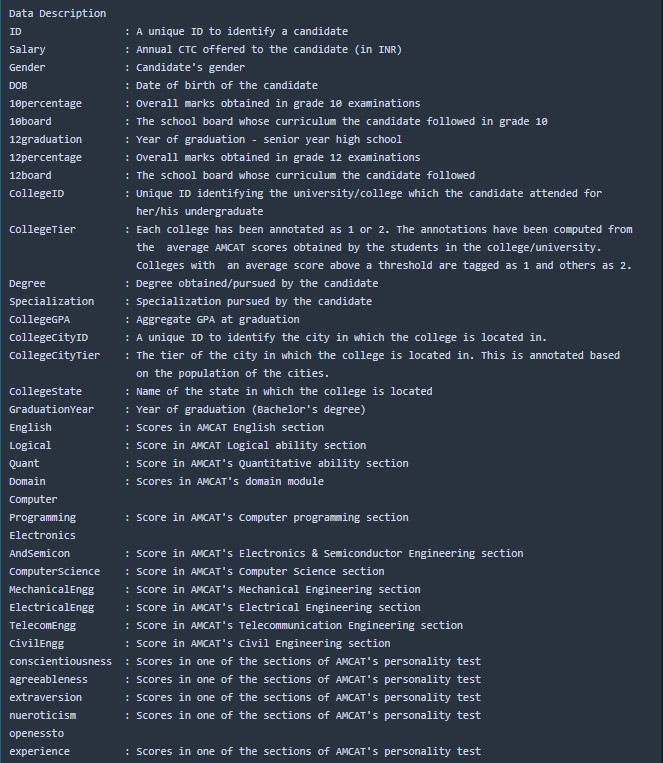




AMCAT (Aspiring Minds Computer Adaptive Test) is an AI-based computer adaptive test which evaluates job applicants on critical areas like communication skills, logical reasoning, quantitative skills, and job-specific domain skills thus helping recruiters identify the suitability of a candidate for different job roles.

In [216]:
data.isnull().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

No missing Data

# 2. Preprocess Data

In [52]:
corr = data.corr()

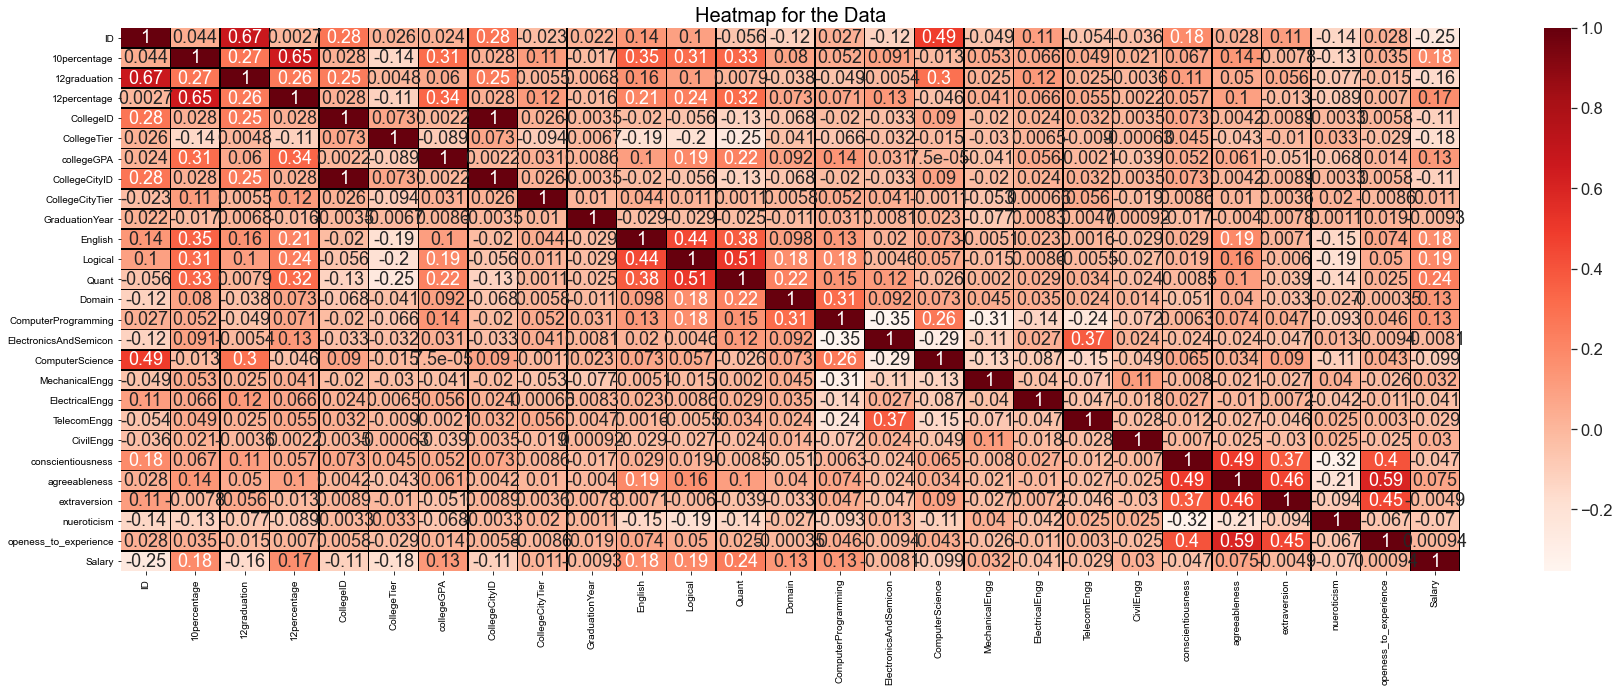

In [5]:
fig, ax = plt.subplots(figsize=(30,10))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [217]:
data.corr()["Salary"].sort_values(ascending=False)

Salary                   1.000000
Quant                    0.239345
Logical                  0.193647
10percentage             0.181414
English                  0.179668
12percentage             0.172755
ComputerProgramming      0.134235
Domain                   0.132845
collegeGPA               0.131912
agreeableness            0.074756
MechanicalEngg           0.032333
CivilEngg                0.030387
CollegeCityTier          0.011149
openess_to_experience    0.000940
extraversion            -0.004930
ElectronicsAndSemicon   -0.008085
GraduationYear          -0.009333
TelecomEngg             -0.029485
ElectricalEngg          -0.041403
conscientiousness       -0.047134
nueroticism             -0.069983
ComputerScience         -0.099373
CollegeID               -0.114908
CollegeCityID           -0.114908
12graduation            -0.161793
CollegeTier             -0.177975
ID                      -0.250228
Name: Salary, dtype: float64

### We scope down the project by select only attribute which is connected to computer engineering only



*   Drop unneccesary attribute such as ID ColumnID and CollegeCityID 
*   Drop AMCAT Specialize score column which that attribute is not related to Computer Engineering Sepcialization Field


*   Drop Colleage name to prevent bias variable
*   Drop High School Education Background 





In [211]:
#Set 1
#data.drop(['ID','DOB','10percentage','10board','12graduation',,'12percentage','12board','CollegeID','CollegeCityID','CollegeState','ComputerScience','ElectronicsAndSemicon','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg'], axis=1, inplace=True)

In [218]:
#Set 2
data.drop(['ID','DOB','10board','12graduation','12board','CollegeID','CollegeCityID','CollegeState','ComputerScience','ElectronicsAndSemicon','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg'], axis=1, inplace=True)

In [219]:
data

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,1,2013,650,665,810,0.694479,485,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,0,2014,440,435,210,0.342315,365,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,0,2011,485,475,505,0.824666,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,1,2013,675,620,635,0.990009,655,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,1,2012,575,495,365,0.278457,315,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,f,75.00,73.00,2,B.Tech/B.E.,electronics and communication engineering,70.00,1,2010,505,485,445,0.538387,245,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,f,84.00,77.00,2,B.Tech/B.E.,information technology,75.20,0,2012,345,585,395,0.190153,315,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,m,91.40,65.56,2,B.Tech/B.E.,information technology,73.19,0,2011,385,425,485,0.600057,435,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,m,88.64,65.16,2,B.Tech/B.E.,computer engineering,74.81,1,2011,465,645,505,0.901490,545,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


In [220]:
data['Degree'].value_counts()

B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

Choose only computer engineering

In [221]:
speclialize_data = data[~(data['Specialization'] == 'computer engineering')].index 
data.drop(speclialize_data , inplace=True)
data

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
16,m,81.70,75.80,2,B.Tech/B.E.,computer engineering,78.70,0,2011,475,245,485,0.735796,475,-1.3447,-1.3713,-0.4891,0.17980,1.2923,500000
24,f,67.06,70.67,2,B.Tech/B.E.,computer engineering,55.50,1,2012,440,440,385,0.144790,435,1.1336,-0.2871,-0.1437,0.14590,0.2889,120000
27,m,86.17,78.60,1,B.Tech/B.E.,computer engineering,73.34,1,2010,505,495,695,0.987207,645,-1.4992,0.5008,0.2366,0.64980,0.6603,500000
41,m,91.00,83.00,2,B.Tech/B.E.,computer engineering,71.00,0,2012,475,495,565,0.930371,565,1.1283,0.6568,-0.3440,-0.76030,-0.4455,165000
58,m,63.00,66.00,2,B.Tech/B.E.,computer engineering,65.55,0,2012,435,465,465,0.704090,465,-3.6631,-2.1513,0.0914,1.32553,-1.2354,450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,m,82.80,75.00,2,B.Tech/B.E.,computer engineering,79.00,0,2010,545,665,635,0.979522,625,0.6646,-0.4353,0.2366,-0.64280,-0.4455,380000
2981,m,79.86,78.86,2,B.Tech/B.E.,computer engineering,74.44,0,2012,375,555,555,0.670743,455,1.3215,0.3448,-0.4891,-1.23030,0.3444,415000
2987,m,89.00,95.30,2,B.Tech/B.E.,computer engineering,74.80,1,2011,485,445,595,0.793581,495,-0.7264,-0.9033,-1.5051,-0.52530,-0.6035,575000
2988,f,85.00,95.00,2,B.Tech/B.E.,computer engineering,77.50,1,2012,575,635,565,0.843124,515,0.3555,0.6568,0.3817,-0.64280,0.4234,420000


Visualize Variance of data

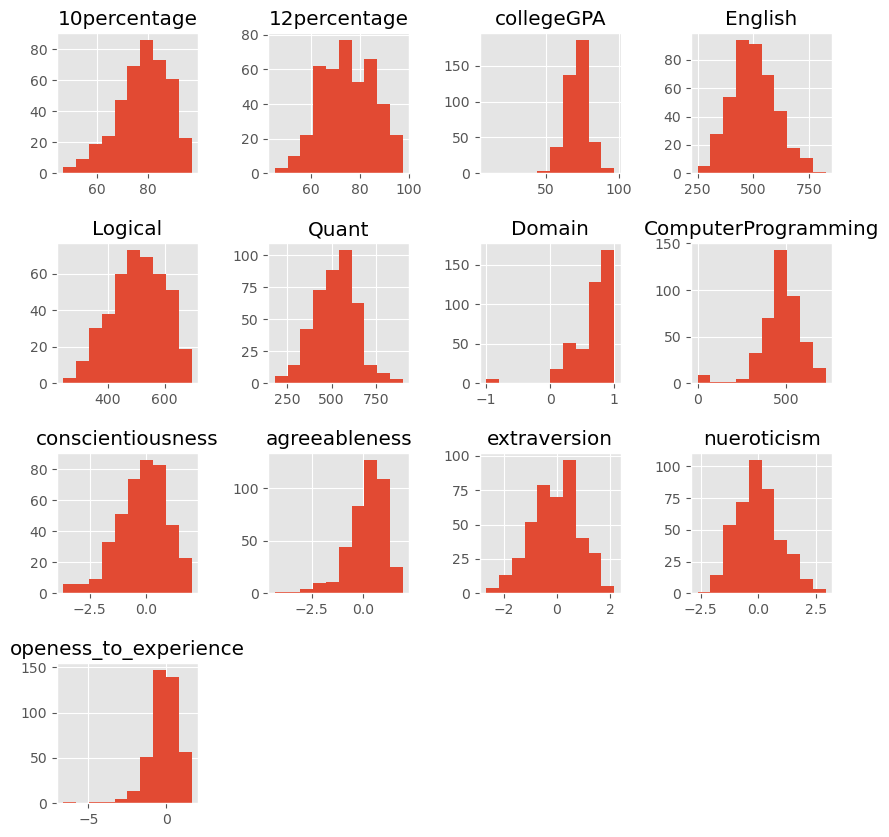

In [222]:
#header = ['10percentage','12percentage','CollegeTier','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming',
 #        'Specialization_computer engineering']
header = ['10percentage','12percentage','collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

From the graph Domain and Computer Programming have a data which is not group with other

In [223]:
#Drop -1 Data in Domain
Domain_data = data[(data['Domain'] == -1)].index 
data.drop(Domain_data , inplace=True)

In [224]:
#Drop 0 and -1 Computer Programming Score  
C_Score_data = data[(data['ComputerProgramming'] == 0)].index 
data.drop(C_Score_data , inplace=True)

C_Score_data = data[(data['ComputerProgramming'] == -1)].index 
data.drop(C_Score_data , inplace=True)

In [225]:
data['CollegeTier'].value_counts()

2    375
1     31
Name: CollegeTier, dtype: int64

In [226]:
data['Degree'].value_counts()

B.Tech/B.E.     397
M.Tech./M.E.      9
Name: Degree, dtype: int64

Drop M.Tech/M.E Beacuse have only 1 data

In [227]:
#Drop M.Tech/M.E
Degree_data = data[(data['Degree'] == "M.Tech./M.E.")].index 
data.drop(Degree_data , inplace=True)

Drop Graduation year

In [228]:
data.drop(['GraduationYear'],axis=1 , inplace=True)

Drop outlinear data

In [229]:
G = data[(data['Salary'] > 1250000)].index 
data.drop(G , inplace=True)

Duplicate Data and split some column

In [230]:
new_data = pd.get_dummies(data)
new_data.drop('Specialization_computer engineering', axis=1, inplace=True)
new_data.drop('Degree_B.Tech/B.E.', axis=1, inplace=True)
new_data

,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityTier,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Gender_f,Gender_m
16,81.70,75.80,2,78.70,0,475,245,485,0.735796,475,-1.3447,-1.3713,-0.4891,0.17980,1.2923,500000,0,1
24,67.06,70.67,2,55.50,1,440,440,385,0.144790,435,1.1336,-0.2871,-0.1437,0.14590,0.2889,120000,1,0
27,86.17,78.60,1,73.34,1,505,495,695,0.987207,645,-1.4992,0.5008,0.2366,0.64980,0.6603,500000,0,1
41,91.00,83.00,2,71.00,0,475,495,565,0.930371,565,1.1283,0.6568,-0.3440,-0.76030,-0.4455,165000,0,1
58,63.00,66.00,2,65.55,0,435,465,465,0.704090,465,-3.6631,-2.1513,0.0914,1.32553,-1.2354,450000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,82.80,75.00,2,79.00,0,545,665,635,0.979522,625,0.6646,-0.4353,0.2366,-0.64280,-0.4455,380000,0,1
2981,79.86,78.86,2,74.44,0,375,555,555,0.670743,455,1.3215,0.3448,-0.4891,-1.23030,0.3444,415000,0,1
2987,89.00,95.30,2,74.80,1,485,445,595,0.793581,495,-0.7264,-0.9033,-1.5051,-0.52530,-0.6035,575000,0,1
2988,85.00,95.00,2,77.50,1,575,635,565,0.843124,515,0.3555,0.6568,0.3817,-0.64280,0.4234,420000,1,0


In [68]:
new_data.isnull().sum()

10percentage             0
12percentage             0
CollegeTier              0
collegeGPA               0
CollegeCityTier          0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
Gender_f                 0
Gender_m                 0
dtype: int64

print to see all value

In [166]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(new_data)

# !!!Export Only!!! Do not always execute 

Execute only data with all column in computer engineering field only

In [21]:
new_data.to_csv('Computer_Engineering_Salary_Prediction.csv', index=False)

# 3.Analytic data

Visualize Correlation of data using Correlation Matrix

In [388]:
import statsmodels.formula.api as smf
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='Salary ~ ComputerProgramming + Logical', data=new_data).fit()

# print the coefficients
print(lm1.params)

Intercept             -53689.896245
ComputerProgramming      524.285402
Logical                  313.432802
dtype: float64


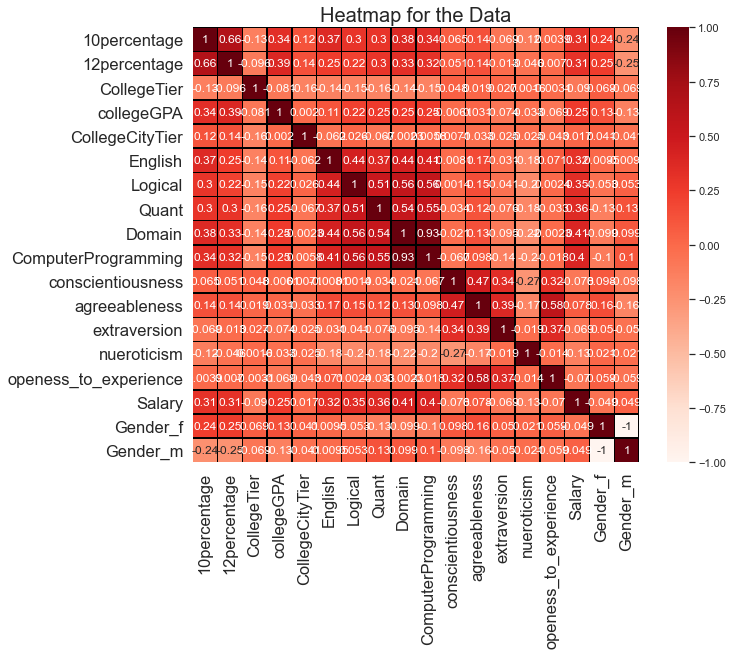

In [129]:
#Create Correlation matrix 
corr = new_data.corr()

fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

# เทียบเงินเดือนกับความสัมพันธ์แต่ละอย่าง

มี 6 คน ที่คะแแนไม่เกาะกลุ่ม หาความผิดปกติของกลุ่มนี้

<AxesSubplot:xlabel='Logical', ylabel='Salary'>

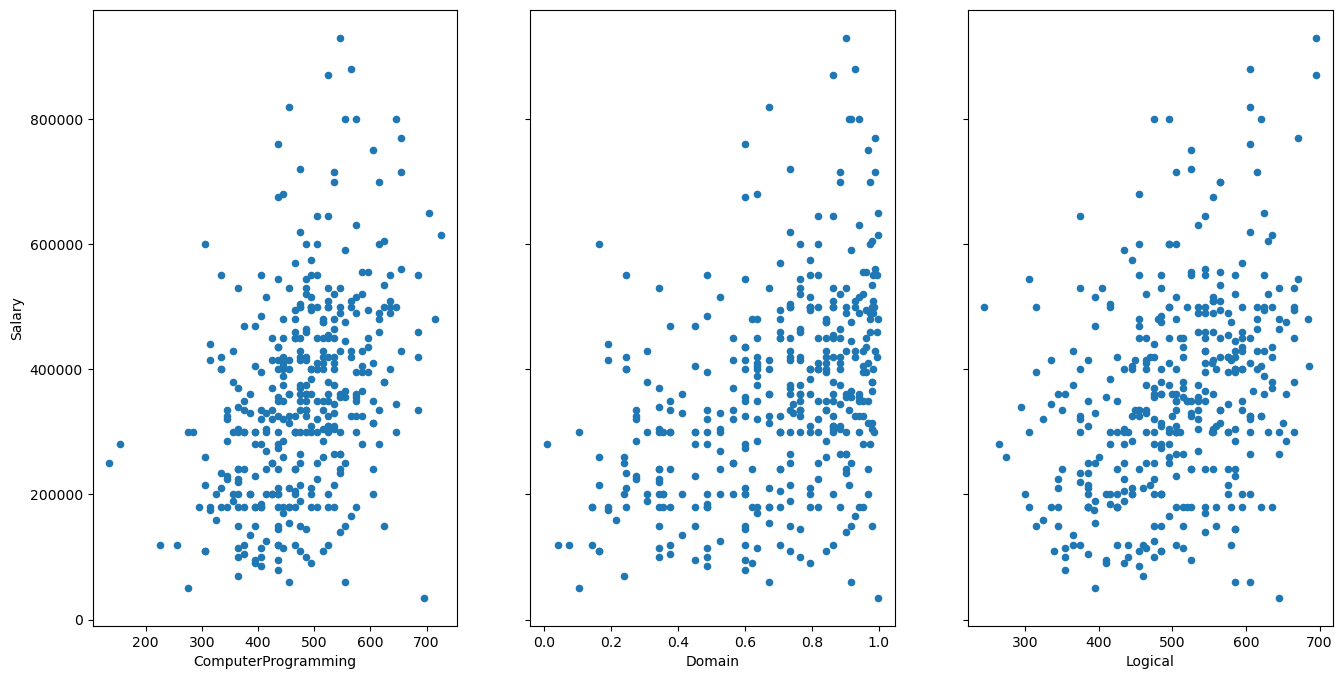

In [389]:
fig,axs = plt.subplots(1,3,sharey=True)
new_data.plot(kind='scatter', x='ComputerProgramming',y='Salary',ax=axs[0],figsize=(16,8))
new_data.plot(kind='scatter', x='Domain',y='Salary',ax=axs[1])
new_data.plot(kind='scatter', x='Logical',y='Salary',ax=axs[2])

กลุ่มนักเรียนนี้เป็นชาย 5 หญิง 1

In [131]:
#Student
student = new_data[new_data.Salary>1250000]
student

,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityTier,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Gender_f,Gender_m


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='English', ylabel='Salary'>

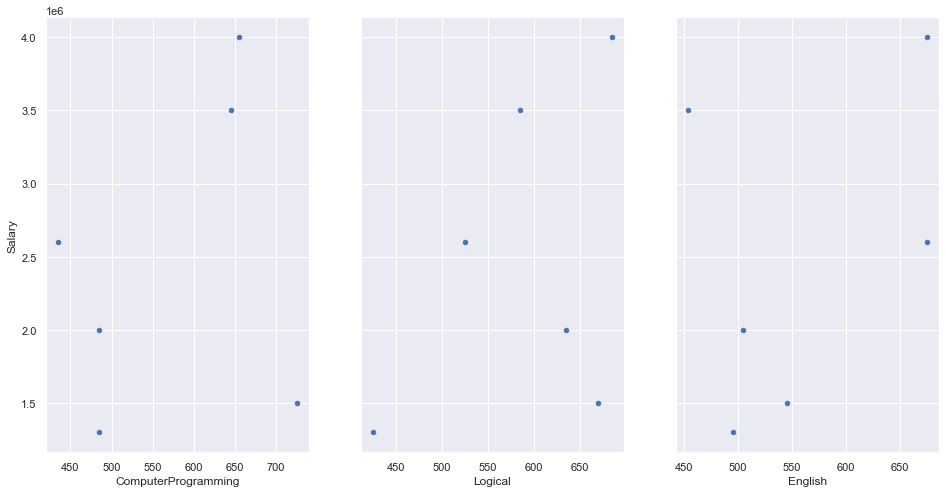

In [267]:
fig,axs = plt.subplots(1,3,sharey=True)
student.plot(kind='scatter', x='ComputerProgramming',y='Salary',ax=axs[0],figsize=(16,8))
student.plot(kind='scatter', x='Logical',y='Salary',ax=axs[1],figsize=(16,8))
student.plot(kind='scatter', x='English',y='Salary',ax=axs[2],figsize=(16,8))

จากกราฟ 
1.คนที่ได้เงินเดือนสูงที่สุด กับคนที่ได้เงินเดือนต่ำอันดับ 2 ทั้งคะแนน ComputerProgramming และ Logical ทั้งสองทำคะแนนได้ไล่เลี่ยกันมาก แต่คนที่ได้เงินเดือนน้อยกว่าทำคะแนนอังกฦษได้ต่ำกว่าเกือบครึ่ง 
2.คนที่ได้เงินเดือน 2600000 ทำคะแนนทุึกวิชาได้น้อยกว่าคนที่ได้เงินเดือน 2000000 แต่คนนี้ได้คะแนนภาษาอังกฤษเยอะกว่ามาก

ดังนั้นภาษาความสำคัญมาก ถ้าอยากได้เงินเดือนสูง

In [70]:
#Student
X_student = new_data[new_data.Salary<1250000]
X_student

,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityTier,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Gender_f,Gender_m
16,81.70,75.80,2,78.70,0,475,245,485,0.735796,475,-1.3447,-1.3713,-0.4891,0.17980,1.2923,500000,0,1
24,67.06,70.67,2,55.50,1,440,440,385,0.144790,435,1.1336,-0.2871,-0.1437,0.14590,0.2889,120000,1,0
27,86.17,78.60,1,73.34,1,505,495,695,0.987207,645,-1.4992,0.5008,0.2366,0.64980,0.6603,500000,0,1
41,91.00,83.00,2,71.00,0,475,495,565,0.930371,565,1.1283,0.6568,-0.3440,-0.76030,-0.4455,165000,0,1
58,63.00,66.00,2,65.55,0,435,465,465,0.704090,465,-3.6631,-2.1513,0.0914,1.32553,-1.2354,450000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,82.80,75.00,2,79.00,0,545,665,635,0.979522,625,0.6646,-0.4353,0.2366,-0.64280,-0.4455,380000,0,1
2981,79.86,78.86,2,74.44,0,375,555,555,0.670743,455,1.3215,0.3448,-0.4891,-1.23030,0.3444,415000,0,1
2987,89.00,95.30,2,74.80,1,485,445,595,0.793581,495,-0.7264,-0.9033,-1.5051,-0.52530,-0.6035,575000,0,1
2988,85.00,95.00,2,77.50,1,575,635,565,0.843124,515,0.3555,0.6568,0.3817,-0.64280,0.4234,420000,1,0


<AxesSubplot:xlabel='ComputerProgramming', ylabel='Salary'>

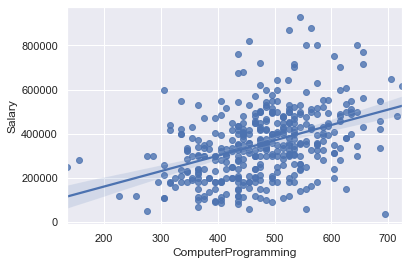

In [269]:
#Verifying relationship between time played and number of wins
sns.regplot(x='ComputerProgramming', y='Salary', data=X_student)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='12percentage', ylabel='Salary'>

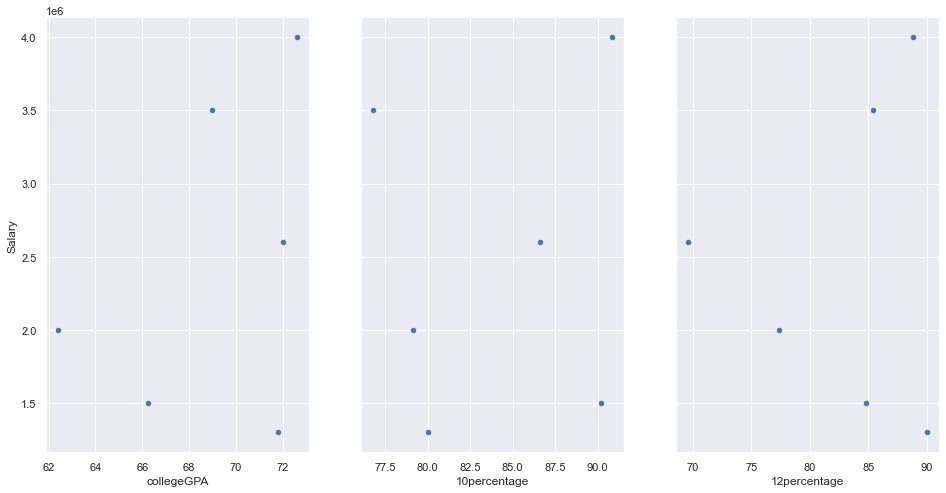

In [270]:
fig,axs = plt.subplots(1,3,sharey=True)
student.plot(kind='scatter', x='collegeGPA',y='Salary',ax=axs[0],figsize=(16,8))
student.plot(kind='scatter', x='10percentage',y='Salary',ax=axs[1],figsize=(16,8))
student.plot(kind='scatter', x='12percentage',y='Salary',ax=axs[2],figsize=(16,8))

จากกราฟบนกราฟล่าง คนที่เงินเดือนสุงที่สุดมีคะแนนมหาลัย คะแนน มลาย และเกรด ที่ค่อนข้างสูงมาตลอดแต่คนที่ได้เงินเดือนต่ำอันดับ 2 ที่สุดก็ได้คะแนนสุงเหมือนกัน แต่เงินเดือนน้อยกว่าคนแรก จึงสรุปได้ว่า คะแนนตอน มปลาย เอามาใข้ตัดสินเงินเดือนไม่ได้

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

<AxesSubplot:xlabel='openess_to_experience', ylabel='Salary'>

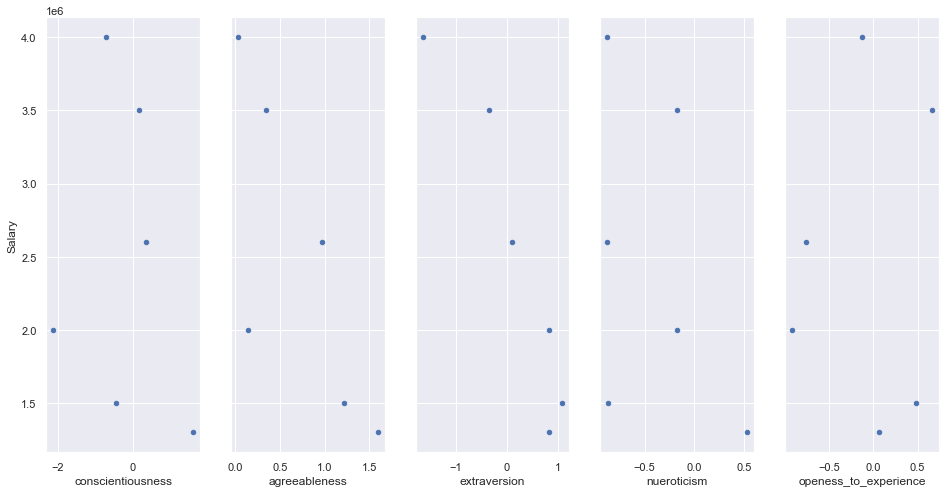

In [271]:
fig,axs = plt.subplots(1,5,sharey=True)
student.plot(kind='scatter', x='conscientiousness',y='Salary',ax=axs[0],figsize=(16,8))
student.plot(kind='scatter', x='agreeableness',y='Salary',ax=axs[1],figsize=(16,8))
student.plot(kind='scatter', x='extraversion',y='Salary',ax=axs[2],figsize=(16,8))
student.plot(kind='scatter', x='nueroticism',y='Salary',ax=axs[3],figsize=(16,8))
student.plot(kind='scatter', x='openess_to_experience',y='Salary',ax=axs[4],figsize=(16,8))

จากกราฟลักษณะนิวัยแถบไม่มีผลต่อเงินเดือนเมื่อเทียบกับคนกลุ่มนี้ที่ได้เงินเดือนวสูงมากๆ โดยเงินเดือนยิ่งเยอะ ลักษณะนิสัยทั้ง 4 ยิ่งเป็น ลบ ยกเว้นกราฟ open to experinece ที่ต่างกับกราฟอื่น

Let's try normal grouup

### Feature Comparison 

ComputerProgramming 

In [390]:
percen_3 = new_data[(new_data['ComputerProgramming'] < 250)]
percen_2 = new_data[(new_data['ComputerProgramming'] >= 251) & (new_data['ComputerProgramming'] <= 500)]
percen_1 = new_data[(new_data['ComputerProgramming'] >= 501) & (new_data['ComputerProgramming'] <= 750)]

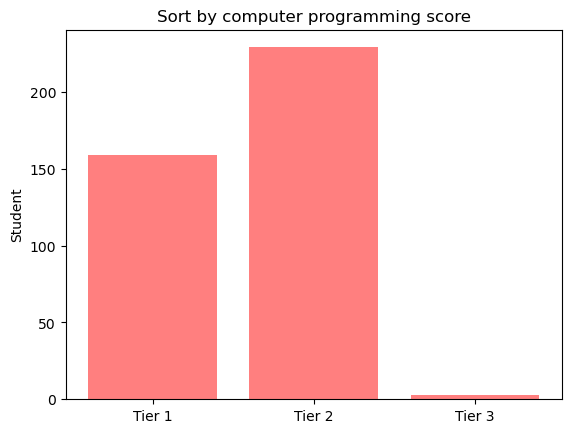

Tier 1 :  159
Tier 2 :  229
Tier 3 :  3


In [391]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Tier 1', 'Tier 2', 'Tier 3')
y_pos = np.arange(len(objects))
performance = [len(percen_1),len(percen_2),len(percen_3)]

plt.bar(y_pos, performance, align='center', alpha=0.5, color="red")
plt.xticks(y_pos, objects)
plt.ylabel('Student')
plt.title('Sort by computer programming score')

plt.show()
print("Tier 1 : ",len(percen_1))
print("Tier 2 : ",len(percen_2))
print("Tier 3 : ",len(percen_3))
print("Mean of Tier 1")

In [409]:
percen_3['Salary'].describe()

count         3.000000
mean     216666.666667
std       85049.005481
min      120000.000000
25%      185000.000000
50%      250000.000000
75%      265000.000000
max      280000.000000
Name: Salary, dtype: float64

In [410]:
percen_2['Salary'].describe()

count       229.000000
mean     312794.759825
std      145343.835434
min       50000.000000
25%      200000.000000
50%      300000.000000
75%      410000.000000
max      820000.000000
Name: Salary, dtype: float64

In [411]:
percen_1['Salary'].describe()

count       159.000000
mean     419025.157233
std      161837.234598
min       35000.000000
25%      315000.000000
50%      410000.000000
75%      500000.000000
max      930000.000000
Name: Salary, dtype: float64

Logical

In [392]:
logic_3 = new_data[(new_data['Logical'] < 250)]
logic_2 = new_data[(new_data['Logical'] >= 251) & (new_data['Logical'] <= 500)]
logic_1 = new_data[(new_data['Logical'] >= 501) & (new_data['Logical'] <= 750)]

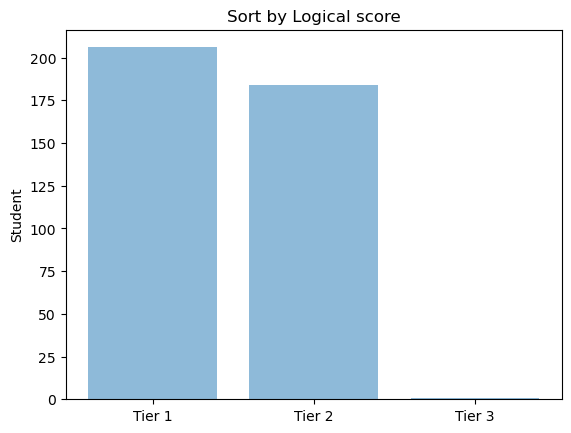

Tier 1 :  206
Tier 2 :  184
Tier 3 :  1


In [393]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Tier 1', 'Tier 2', 'Tier 3')
y_pos = np.arange(len(objects))
performance = [len(logic_1),len(logic_2),len(logic_3)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Student')
plt.title('Sort by Logical score')

plt.show()
print("Tier 1 : ",len(logic_1))
print("Tier 2 : ",len(logic_2))
print("Tier 3 : ",len(logic_3))

English

In [394]:
eng_3 = new_data[(new_data['English'] < 300)]
eng_2 = new_data[(new_data['English'] >= 300) & (new_data['English'] <= 600)]
eng_1 = new_data[(new_data['English'] >= 601) & (new_data['English'] <= 900)]

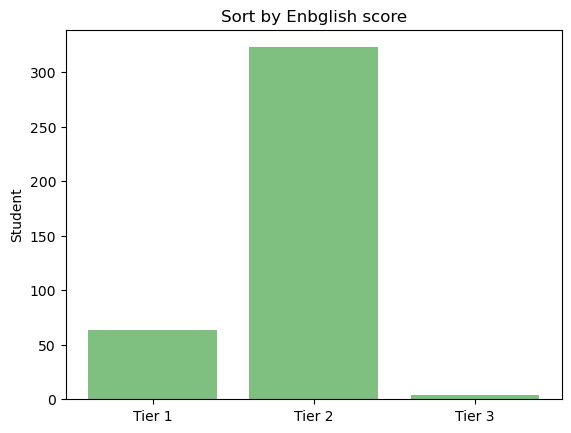

Tier 1 :  64
Tier 2 :  323
Tier 3 :  4


In [395]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Tier 1', 'Tier 2', 'Tier 3')
y_pos = np.arange(len(objects))
performance = [len(eng_1),len(eng_2),len(eng_3)]

plt.bar(y_pos, performance, align='center', alpha=0.5 , color="green")
plt.xticks(y_pos, objects)
plt.ylabel('Student')
plt.title('Sort by Enbglish score')

plt.show()
print("Tier 1 : ",len(eng_1))
print("Tier 2 : ",len(eng_2))
print("Tier 3 : ",len(eng_3))

All 3

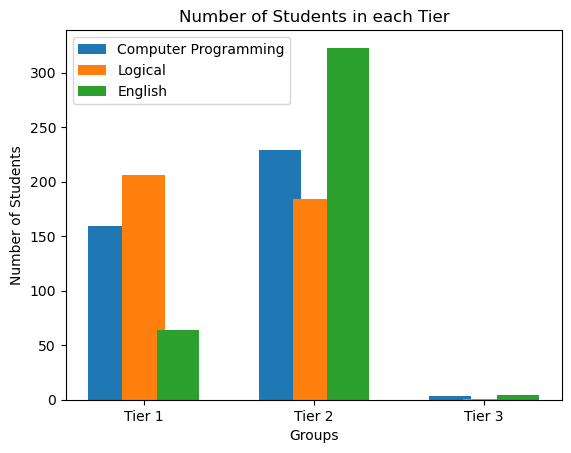

In [396]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Tier 1','Tier 2','Tier 3']
Compro  = [len(percen_1),len(percen_2),len(percen_3)]
Logical = [len(logic_1),len(logic_2),len(logic_3)]
English = [len(eng_1),len(eng_2),len(eng_3)]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Compro, 0.25, label = 'Computer Programming')
plt.bar(X_axis , Logical, 0.25, label = 'Logical')
plt.bar(X_axis + 0.2, English, 0.25, label = 'English')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each Tier")
plt.legend()
plt.show()

Tier 1 

In [458]:
percen_1["Salary"].describe()

count       159.000000
mean     419025.157233
std      161837.234598
min       35000.000000
25%      315000.000000
50%      410000.000000
75%      500000.000000
max      930000.000000
Name: Salary, dtype: float64

In [452]:
percen_2["Salary"].describe()

count       229.000000
mean     312794.759825
std      145343.835434
min       50000.000000
25%      200000.000000
50%      300000.000000
75%      410000.000000
max      820000.000000
Name: Salary, dtype: float64

In [449]:
percen_3["Salary"].describe()

count         3.000000
mean     216666.666667
std       85049.005481
min      120000.000000
25%      185000.000000
50%      250000.000000
75%      265000.000000
max      280000.000000
Name: Salary, dtype: float64

In [454]:
logic_1["Salary"].describe()

count       206.000000
mean     399854.368932
std      160465.719021
min       35000.000000
25%      300000.000000
50%      400000.000000
75%      490000.000000
max      930000.000000
Name: Salary, dtype: float64

In [451]:
logic_2["Salary"].describe()

count       184.000000
mean     304538.043478
std      146052.534408
min       50000.000000
25%      200000.000000
50%      300000.000000
75%      400000.000000
max      800000.000000
Name: Salary, dtype: float64

In [448]:
logic_3["Salary"].describe()

count         1.0
mean     500000.0
std           NaN
min      500000.0
25%      500000.0
50%      500000.0
75%      500000.0
max      500000.0
Name: Salary, dtype: float64

In [453]:
eng_1["Salary"].describe()

count        64.000000
mean     452968.750000
std      185300.525423
min       35000.000000
25%      325000.000000
50%      432500.000000
75%      522500.000000
max      930000.000000
Name: Salary, dtype: float64

In [450]:
eng_2["Salary"].describe()

count       323.000000
mean     336021.671827
std      149081.690561
min       50000.000000
25%      210000.000000
50%      335000.000000
75%      430000.000000
max      800000.000000
Name: Salary, dtype: float64

In [447]:
eng_3["Salary"].describe()

count         4.000000
mean     156250.000000
std       99781.010217
min       70000.000000
25%      107500.000000
50%      127500.000000
75%      176250.000000
max      300000.000000
Name: Salary, dtype: float64

Tier 2 

Tier 3 

# 4.Learning Model

In [231]:
corr = new_data.corr()

In [232]:
new_data.describe()

,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityTier,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Gender_f,Gender_m
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,78.164808,75.215115,1.933504,71.243350,0.340153,502.012788,504.033248,524.585678,0.688866,478.680307,-0.178514,0.201211,-0.083534,-0.042502,-0.146018,355255.754476,0.312020,0.687980
std,10.003268,10.806617,0.249467,7.711292,0.474368,100.550905,91.881788,117.850567,0.242593,93.597680,1.064346,0.903029,0.865341,0.911982,0.933457,160817.019961,0.463912,0.463912
min,46.800000,45.000000,1.000000,9.300000,0.000000,250.000000,245.000000,180.000000,0.008537,135.000000,-3.663100,-4.283100,-2.666200,-2.643000,-6.609200,35000.000000,0.000000,0.000000
25%,72.000000,66.830000,2.000000,67.000000,0.000000,435.000000,445.000000,445.000000,0.525923,420.000000,-0.805350,-0.279300,-0.604800,-0.642800,-0.603500,237500.000000,0.000000,0.000000
50%,79.000000,74.330000,2.000000,71.720000,0.000000,495.000000,505.000000,525.000000,0.735796,475.000000,-0.108200,0.344800,-0.053700,-0.084570,-0.129500,350000.000000,0.000000,1.000000
75%,86.160000,83.550000,2.000000,76.230000,1.000000,570.000000,575.000000,605.000000,0.884123,535.000000,0.534550,0.812800,0.526900,0.532300,0.480500,450000.000000,1.000000,1.000000
max,97.120000,97.600000,2.000000,92.300000,1.000000,825.000000,695.000000,900.000000,0.998588,725.000000,1.995300,1.904800,1.978200,2.765000,1.630200,930000.000000,1.000000,1.000000


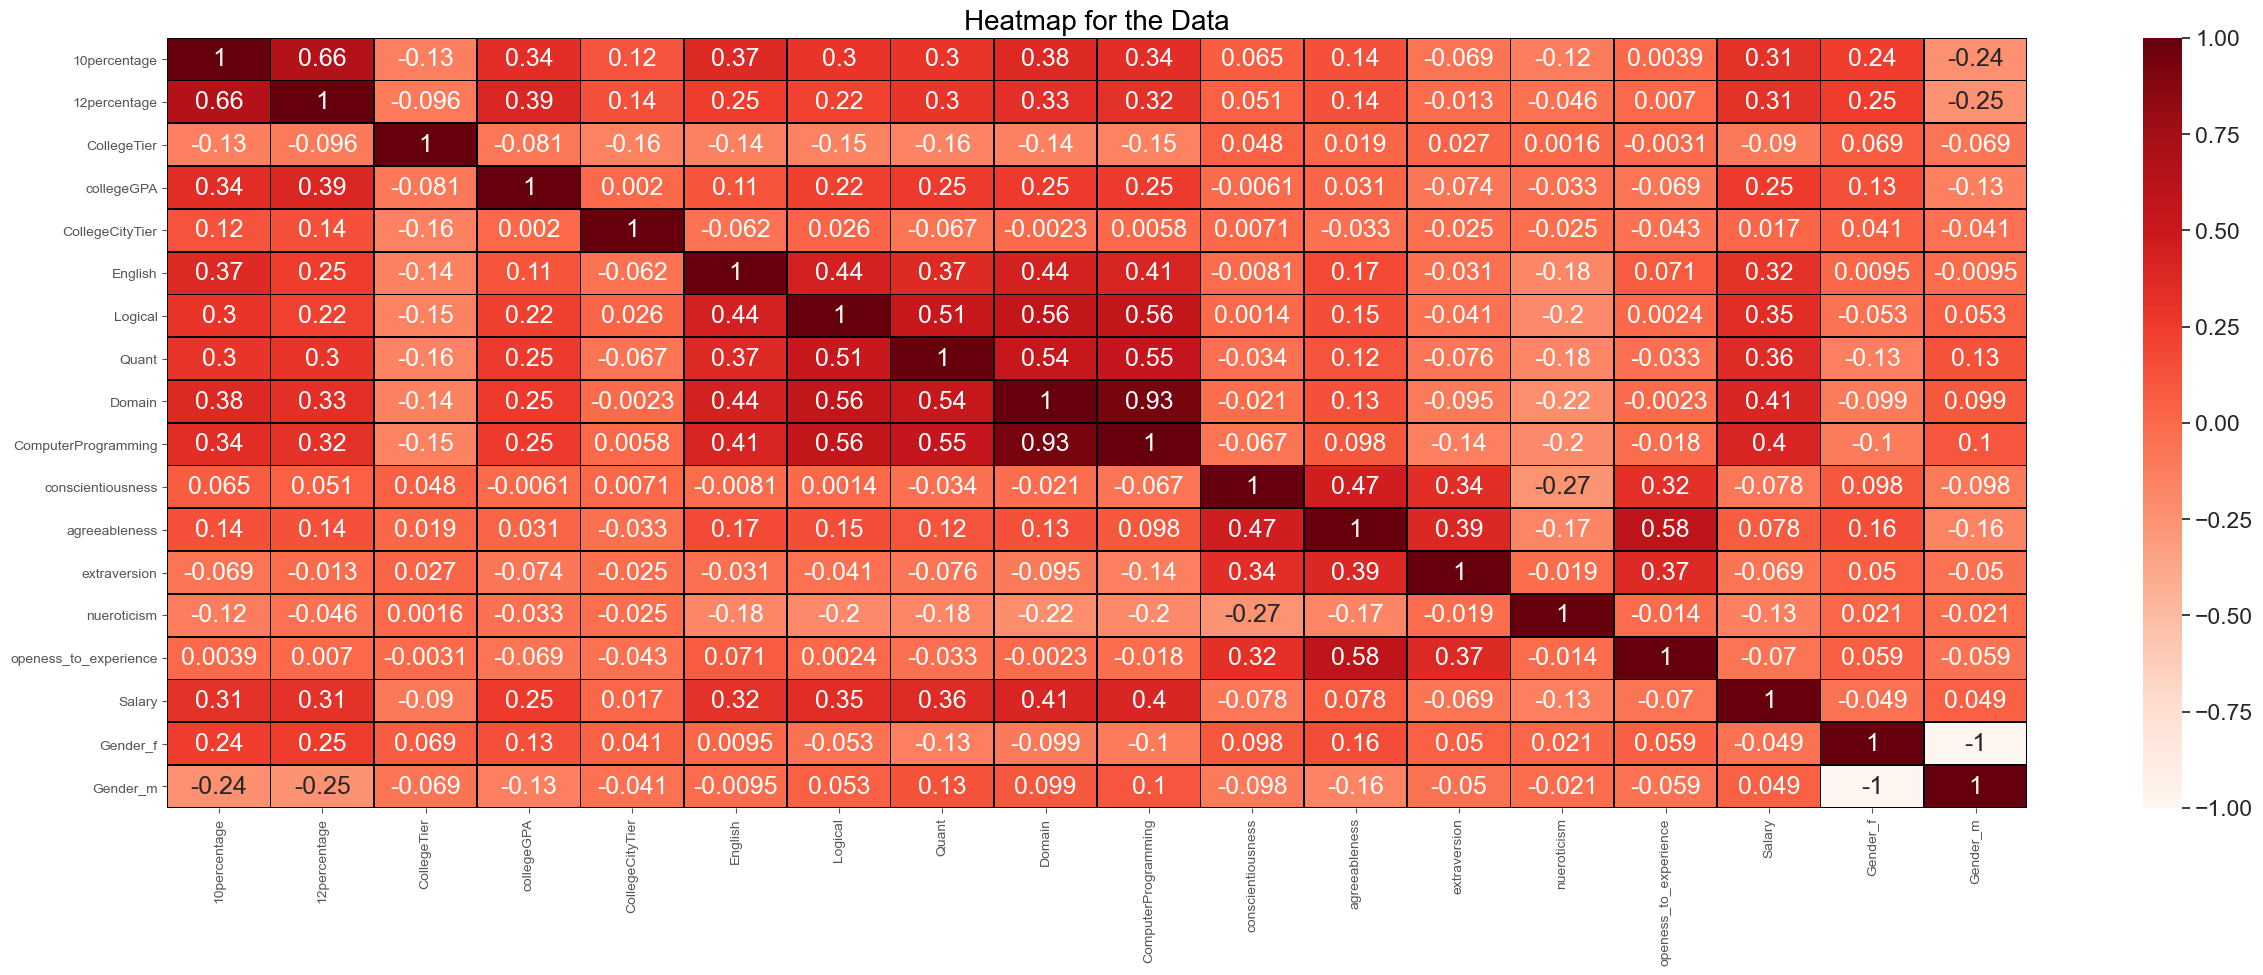

In [233]:
fig, ax = plt.subplots(figsize=(30,10))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [234]:
new_data.corr()["Salary"].sort_values(ascending=False)

Salary                   1.000000
Domain                   0.405299
ComputerProgramming      0.404943
Quant                    0.362267
Logical                  0.349135
English                  0.320180
10percentage             0.314505
12percentage             0.313584
collegeGPA               0.254556
agreeableness            0.077897
Gender_m                 0.048502
CollegeCityTier          0.017343
Gender_f                -0.048502
extraversion            -0.068872
openess_to_experience   -0.070081
conscientiousness       -0.078433
CollegeTier             -0.089693
nueroticism             -0.130037
Name: Salary, dtype: float64

In [235]:
new_data

,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityTier,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Gender_f,Gender_m
16,81.70,75.80,2,78.70,0,475,245,485,0.735796,475,-1.3447,-1.3713,-0.4891,0.17980,1.2923,500000,0,1
24,67.06,70.67,2,55.50,1,440,440,385,0.144790,435,1.1336,-0.2871,-0.1437,0.14590,0.2889,120000,1,0
27,86.17,78.60,1,73.34,1,505,495,695,0.987207,645,-1.4992,0.5008,0.2366,0.64980,0.6603,500000,0,1
41,91.00,83.00,2,71.00,0,475,495,565,0.930371,565,1.1283,0.6568,-0.3440,-0.76030,-0.4455,165000,0,1
58,63.00,66.00,2,65.55,0,435,465,465,0.704090,465,-3.6631,-2.1513,0.0914,1.32553,-1.2354,450000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,82.80,75.00,2,79.00,0,545,665,635,0.979522,625,0.6646,-0.4353,0.2366,-0.64280,-0.4455,380000,0,1
2981,79.86,78.86,2,74.44,0,375,555,555,0.670743,455,1.3215,0.3448,-0.4891,-1.23030,0.3444,415000,0,1
2987,89.00,95.30,2,74.80,1,485,445,595,0.793581,495,-0.7264,-0.9033,-1.5051,-0.52530,-0.6035,575000,0,1
2988,85.00,95.00,2,77.50,1,575,635,565,0.843124,515,0.3555,0.6568,0.3817,-0.64280,0.4234,420000,1,0


## Standardlize Data

In [236]:
#barely help nothing
# standardize numeric variables only
scaler = StandardScaler()

new_data['10percentage'] = scaler.fit_transform(new_data[['10percentage']])
new_data['12percentage'] = scaler.fit_transform(new_data[['12percentage']])
new_data['CollegeTier'] = scaler.fit_transform(new_data[['CollegeTier']])
new_data['collegeGPA'] = scaler.fit_transform(new_data[['collegeGPA']])
new_data['English'] = scaler.fit_transform(new_data[['English']])
new_data['Logical'] = scaler.fit_transform(new_data[['Logical']])
new_data['Quant'] = scaler.fit_transform(new_data[['Quant']])
new_data['Domain'] = scaler.fit_transform(new_data[['Domain']])
new_data['ComputerProgramming'] = scaler.fit_transform(new_data[['ComputerProgramming']])
new_data['nueroticism'] = scaler.fit_transform(new_data[['nueroticism']])
new_data['conscientiousness'] = scaler.fit_transform(new_data[['conscientiousness']])
new_data['agreeableness'] = scaler.fit_transform(new_data[['agreeableness']])
new_data['extraversion'] = scaler.fit_transform(new_data[['extraversion']])
new_data['openess_to_experience'] = scaler.fit_transform(new_data[['openess_to_experience']])

# Feature Selection

In [407]:
#Feature 1, All Colleage score variable
interested_column = ['English','Logical','Quant','Domain','ComputerProgramming']

In [477]:
#MAIN FEATURE
#Feature 2 , All variable except personality behaviour
interested_column = ['collegeGPA','English','Logical','Quant','Domain','ComputerProgramming','10percentage','12percentage']

In [431]:
#Feature 3 , personality behaviour
interested_column = ['conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']

In [438]:
#Feature 4, Top 3 Highest Coreelation
interested_column = ['Logical','English','ComputerProgramming']

In [448]:
#Feature 5 , Background Education Score
interested_column = ['10percentage','12percentage']

In [458]:
#Feature 6 , Background Education Score
interested_column = ['ComputerProgramming']

### Fetching Dataset

Test 1 apply with #Feature 2, without delete some data  value : test_size=0.28, random_state=43
Result of R2 Score is around 25

Test 2 apply with #Feature 2, delete some data  value : test_size=0.26, random_state=59
Result of R2 Score is around 31.24

Test 3 apply with #Feature 1,(already delete some data)
Result of R2 Score is around  26.13

Test 4 apply with #Feature 3,(already delete some data)
Result of R2 Score is around 1.63

Test 5 apply with #Feature 4,(already delete some data) test_size=0.29, random_state=70
Result of R2 Score is around 25.60


In [481]:
# example of training a final regression model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)
# fit final model
model = LinearRegression()
model.fit(X, y)
# new instances where we do not know the answer
Xnew, _ = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-1.07296862 -0.52817175], Predicted=-103.69851847130518
X=[-0.61175641  1.62434536], Predicted=-51.46703482298343
X=[-2.3015387   0.86540763], Predicted=-214.48038036661174


In [469]:

X1 = new_data['73.34','505','495','695','0.987','645','86.17','78.6'].values       #Salary is our target
y1 = new_data['Salary'].values                  #Target = Salary

In [470]:
# split, random_state is used for repeatable results, you should remove it if you are running your own code.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.26, random_state=59)

In [471]:
print('X train size: ', X1_train.shape)
print('y train size: ', y1_train.shape)
print('X test size: ', X1_test.shape)
print('y test size: ', y1_test.shape)

X train size:  (289, 8)
y train size:  (289,)
X test size:  (102, 8)
y test size:  (102,)


### Linear Ridge Regression

Use gridsearchCV to help tuning parameter with Linear regression
Use K-fold to find the best CV for GridsearchCV

In [472]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=5)
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag','auto']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1,10,50,100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

In [473]:
from sklearn.linear_model import Ridge

lr = Ridge()
search = GridSearchCV(lr, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv) #score = MAE
result = search.fit(X1_train, y1_train)

In [474]:
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
import sklearn.linear_model 

y_true, y_pred = y1_test, search.predict(X1_test)
rms = mean_squared_error(y_true, y_pred, squared=False)
print('MSE on the evaluation set: ', mean_squared_error(y_true, y_pred))
print('R2 on the evaluation set: ', r2_score(y_true, y_pred))
print('RMSE on the evaluation set: ', rms)
print('MAE on the evaluation set: ', mean_absolute_error(y_true, y_pred))
print('Variance score: ' , result.score(X1_test, y1_test))

MSE on the evaluation set:  16918146510.646206
R2 on the evaluation set:  0.31248677691790516
RMSE on the evaluation set:  130069.77554622828
MAE on the evaluation set:  104256.14512393821
Variance score:  -104256.14512393821


# Linear Regression

In [465]:
from sklearn import linear_model
from sklearn import metrics

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X1_train, y1_train)

# Make predictions using the testing set
y_pred = regr.predict(X1_test)

In [466]:
# The intercept
print('Interccept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)

Interccept: 
 348307.225493213
Coefficients: 
 [62265.26139067]


In [467]:
mse = metrics.mean_squared_error(y1_test,y_pred)
rmse = np.sqrt(mean_squared_error(y1_test, y_pred))
r2 = r2_score(y1_test,y_pred)
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("r2-Score: %f" % (r2))

pred_train_lr= regr.predict(X1_train)
print(np.sqrt(mean_squared_error(y1_train,pred_train_lr)))
print(r2_score(y1_train, pred_train_lr))

MSE: 23186228036.160297
RMSE: 152270.246720
r2-Score: 0.147976
144726.73347771852
0.160970475072996


In [475]:
y_pred

array([369332.74660128, 282969.9036433 , 275264.70479007, 442219.86026362,
       299578.55350652, 313343.19780367, 379293.67232429, 290610.72645864,
       261749.68475397, 404476.8848213 , 450039.12528321, 451317.95332651,
       235657.53835015, 387919.38925088, 489378.46605531, 418431.62269692,
       450647.968214  , 350313.63785843, 338898.7152436 , 404517.50828074,
       389387.50776283, 253927.6363984 , 356758.05558246, 255010.53023803,
       402309.00374908, 472562.13638275, 410863.82855041, 334437.70156765,
       405498.99558605, 235523.75380445, 376189.72541454, 374801.00134733,
       427425.48210863, 447394.88399397, 387353.98327657, 393826.00141585,
       394167.37899716, 343794.87774858, 487124.20358159, 384102.25160998,
       350017.03922398, 293690.55207808, 321359.27725257, 344807.42651747,
       305608.84973843, 404608.64803381, 373785.05351081, 221250.88064215,
       389462.77475686, 247483.04327004, 371204.5727084 , 327732.54430562,
       413814.30565737, 4

ValueError: x and y must be the same size

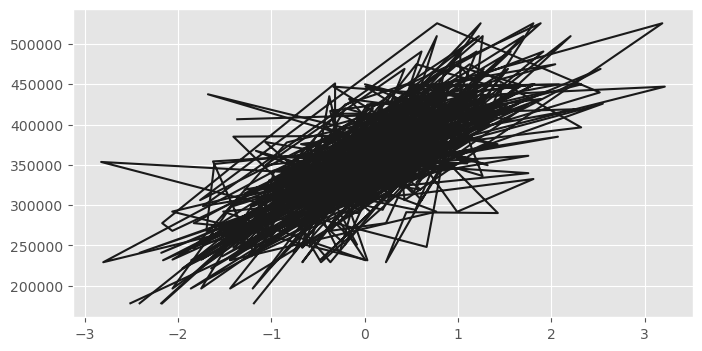

In [417]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X1_test, y_pred, color='k', label='Regression model')
ax.scatter(X1_test, y1_test, edgecolor='k', facecolor='red', alpha=0.7, label='Sample data')
ax.set_ylabel('Computer Programming', fontsize=14)
ax.set_xlabel('Salary', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

In [312]:
y_pred

array([348130.86899311, 327354.96152134, 278877.8440872 , 424309.19638961,
       334280.26401193, 327354.96152134, 299653.75155897, 327354.96152134,
       306579.05404956, 348130.86899311, 445085.10386138, 410458.59140843,
       265027.23910602, 417383.89389902, 465861.01133315, 465861.01133315,
       424309.19638961, 389682.68393665, 341205.56650252, 334280.26401193,
       375832.07895547, 278877.8440872 , 334280.26401193, 271952.54159661,
       388990.15368759, 424309.19638961, 403533.28891783, 341205.56650252,
       403533.28891783, 271952.54159661, 361981.47397429, 452010.40635197,
       382757.38144606, 382757.38144606, 341205.56650252, 348130.86899311,
       375832.07895547, 431234.4988802 , 500487.52378611, 361981.47397429,
       285803.14657779, 278877.8440872 , 355056.1714837 , 396607.98642724,
       320429.65903075, 410458.59140843, 361981.47397429, 258101.93661543,
       389682.68393665, 292728.44906838, 410458.59140843, 355056.1714837 ,
       424309.19638961, 4

In [313]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10



# Neural Network

### Class MLPRegressor

In [45]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

regr = MLPRegressor(activation='relu').fit(X1_train, y1_train)
regr.predict(X1_test)
regr.score(X1_test, y1_test)

y_true, y_pred = y1_test, regr.predict(X1_test)
rms = mean_squared_error(y_true, y_pred, squared=False)
print('MSE on the evaluation set: ', mean_squared_error(y_true, y_pred))
print('R2 on the evaluation set: ', r2_score(y_true, y_pred))
print('RMSE on the evaluation set: ', rms)
print('MAE on the evaluation set: ', mean_absolute_error(y_true, y_pred))

MSE on the evaluation set:  144625268097.79483
R2 on the evaluation set:  -4.8772268077036
RMSE on the evaluation set:  380296.2898817116
MAE on the evaluation set:  346440.3960422075


C:\Users\OU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPRegressor
    
estimator=MLPRegressor()

param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05 , .1],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam']}

gsc = GridSearchCV(estimator,param_grid,cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X1, y1)

best_params = grid_result.best_params_

best_mlp = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                        activation =best_params["activation"],
                        solver=best_params["solver"]
                        #,max_iter= 5000, n_iter_no_change = 200
                       )
scoring = {
           'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error',
           'r2':'r2'
}

print(best_params)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


C:\Users\OU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
scores = cross_validate(best_mlp, X1, y1, cv=10, scoring=scoring, return_train_score=True, return_estimator = False)

C:\Users\OU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\OU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\OU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\OU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\OU\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

abs error คือ mean absolute error (ด้วยการนำมาลบกันตรง ๆ แล้วหาค่าเฉลี่ย โดยไม่สนใจเครื่องหมาย (Absolute) เพื่อหาขนาดของ Error โดยไม่สนใจทิศทาง )
squared_error คือ MSE (ด้วยการนำมาลบกัน แล้วยกกำลังสอง (Squared) เพื่อไม่ต้องสนใจค่าติดลบ แล้วหาค่าเฉลี่ย)
r2score คิอ สถิติที่ใช้วัดว่าตัวแบบคณิตศาสตร์ที่ได้นี้มีความสมรูปกับข้อมูลมากน้อยอย่างไร

In [48]:
scores

{'fit_time': array([0.50461316, 0.5626452 , 0.52760887, 0.55266237, 0.56801152,
        0.51664305, 0.51168251, 0.50868726, 0.48127866, 0.51165438]),
 'score_time': array([0.00398898, 0.004987  , 0.00398922, 0.00199461, 0.00399041,
        0.00199389, 0.00299191, 0.00299335, 0.00299287, 0.00199437]),
 'test_abs_error': array([-233176.28688205, -184906.66178289, -188942.29959061,
        -209786.06545287, -251680.18821539, -227731.29184346,
        -193967.74160408, -252726.20345995, -208619.59332772,
        -253490.33391863]),
 'train_abs_error': array([-224368.34971491, -212200.63232519, -215735.3535529 ,
        -220668.96136773, -223234.55655825, -211516.22693158,
        -200206.78856522, -239050.88773422, -224805.67713197,
        -242402.50835273]),
 'test_squared_error': array([-7.72689180e+10, -5.78158944e+10, -5.69087150e+10, -5.57810884e+10,
        -8.31822061e+10, -7.14688541e+10, -6.01083399e+10, -8.87243193e+10,
        -6.44388742e+10, -8.86751154e+10]),
 'train_squared

### XGBoost Model 

tune with gridsearchCV and use k-fold to find best CV

In [36]:
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

xgb_model = xgb.XGBClassifier()

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = {
    'max_depth': range (1, 10),
    'n_estimators': range (1, 10),
    'learning_rate': [0.1, 0.01, 0.05, 0.2, 0.15],
    'max_depth': [15,20,25],
    'subsample': [0.7, 0.8, 0.9]
}

clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=5,random_state=1, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

result = clf.fit(X1_train, y1_train)
# Root Mean Squared Error
print(np.sqrt(-result.best_score_))
print(result.best_params_)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[13:07:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
nan
{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 1, 'subsample': 0.7}


C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

In [37]:
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

y_true, y_pred = y1_test, result.predict(X1_test)
rms = mean_squared_error(y_true, y_pred, squared=False)
print('MSE on the evaluation set: ', mean_squared_error(y_true, y_pred))
print('R2 on the evaluation set: ', r2_score(y_true, y_pred)*100)
print('RMSE on the evaluation set: ', rms)
print('MAE on the evaluation set: ', mean_absolute_error(y_true, y_pred))

MSE on the evaluation set:  32462931034.482758
R2 on the evaluation set:  -38.573995034813805
RMSE on the evaluation set:  180174.723628157
MAE on the evaluation set:  138563.2183908046


### Lasso Regression 

In [489]:
from sklearn.linear_model import Lasso
from numpy import arange

#Define Lasso Model
ll = Lasso()
#use K-Fold to find the best CV
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#grid = dict()
#grid['alpha'] = arange(0,1,0.01)
space2 = dict()
space2['alpha'] = arange(0,1,0.01)
space2['selection'] = ['cyclic','random']
space2['fit_intercept'] = [True, False]
space2['normalize'] = [True, False]
# define search
search2 = GridSearchCV(ll, space2, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#search2 = GridSearchCV(ll, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [490]:
results2 = search2.fit(X1_train, y1_train)

In [491]:
print('MAE: %.3f' % results2.best_score_)
print('Best Hyperparameters: %s' % results2.best_params_)

MAE: -163063.220
Best Hyperparameters: {'alpha': 0.99, 'fit_intercept': True, 'normalize': True, 'selection': 'cyclic'}


In [492]:
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

y_true, y_pred = y1_test, results2.predict(X1_test)
rms = mean_squared_error(y_true, y_pred, squared=False)
print('MSE on the evaluation set: ', mean_squared_error(y_true, y_pred))
print('R2 on the evaluation set: ', r2_score(y_true, y_pred)*100)
print('RMSE on the evaluation set: ',rms)
print('MAE on the evaluation set: ', mean_absolute_error(y_true, y_pred))

MSE on the evaluation set:  34825449011.51247
R2 on the evaluation set:  20.944631704809737
RMSE on the evaluation set:  186615.77910646374
MAE on the evaluation set:  138780.25886757337


### Random Forest using gridsearchCV

In [493]:
def print_evaluate(predicted,true):  
    mse = metrics.mean_squared_error(true, predicted)
    print('MSE:', mse)

In [509]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

params = {
    'bootstrap': [True],
    'max_depth': [1,10,30,50, 75],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1,3],
    'min_samples_split': [3,1],
    'n_estimators': [1,10,100,200]}
rfr = RandomForestRegressor()
rf_grid=GridSearchCV(rfr, params, n_jobs=1, cv=3,scoring='neg_mean_squared_error')
result_rf = rf_grid.fit(X1_train,y1_train)
y1_pred = rf_grid.predict(X1_test)

print('Best Hyperparameters: %s' % result_rf.best_params_)

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

Best Hyperparameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 10}


C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OU\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\OU\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

In [510]:
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

y_true, y_pred = y1_test, result_rf.predict(X1_test)
rms = mean_squared_error(y_true, y_pred, squared=False)
print('MSE on the evaluation set: ', mean_squared_error(y_true, y_pred))
print('R2 on the evaluation set: ', r2_score(y_true, y_pred)*100)
print('RMSE on the evaluation set: ',rms)
print('MAE on the evaluation set: ', mean_absolute_error(y_true, y_pred))

MSE on the evaluation set:  44398159932.60856
R2 on the evaluation set:  -0.7858616249523553
RMSE on the evaluation set:  210708.70872512262
MAE on the evaluation set:  152518.16809733474


### KNN Neighbor

In [512]:
from sklearn.neighbors import KNeighborsRegressor
params = {'n_neighbors' : [2,3,4,5,49,100] ,    
              'weights' : ['uniform','distance'] ,
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}

knn = KNeighborsRegressor()
knn_grid = GridSearchCV(knn, params, scoring='neg_mean_squared_error', cv=3, n_jobs=1)
result_knn = knn_grid.fit(X_train, y_train)
pknn = knn_grid.predict(X_test)
print_evaluate(pknn,y_test)

MSE: 63123721799.94445
